In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:

data=pd.read_csv('Bengaluru_House_Data.csv')
data.head(7)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [7]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


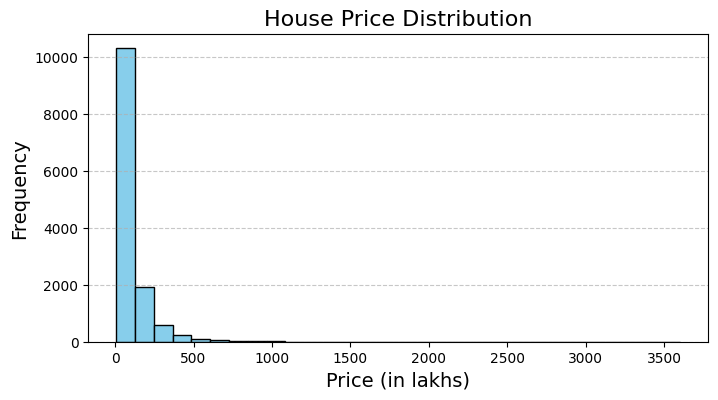

In [9]:

    plt.figure(figsize=(8, 4))
    plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
    plt.title('House Price Distribution', fontsize=16)
    plt.xlabel('Price (in lakhs)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


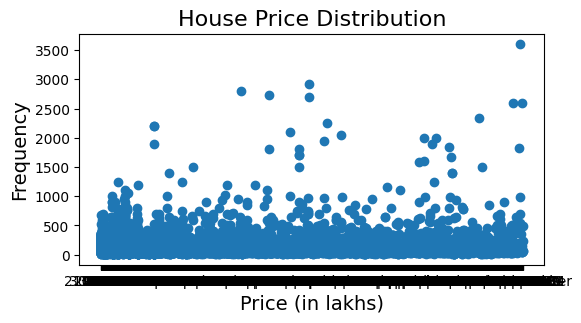

In [10]:
plt.figure(figsize=(6,3))
plt.scatter(data['total_sqft'],data['price'])
plt.title('House Price Distribution', fontsize=16)
plt.xlabel('Price (in lakhs)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [11]:
data['location']=data['location'].fillna('Sarjapur road')

data['size']=data['size'].fillna('2 BHK')
data['bath']=data['bath'].fillna(data['bath'].median())

data.info()
# so there all NULL value are replaced 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [13]:
data[data.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
data['total_sqft'].value_counts()

total_sqft
1200           843
1100           221
1500           205
2400           196
600            180
              ... 
2920             1
5665.84          1
1369             1
7150             1
1200 - 1470      1
Name: count, Length: 2117, dtype: int64

In [15]:
def convert(x):
    var=x.split('-')
    if(len(var)==2):
        return (float(var[0])+ float(var[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
data['total_sqft']=data['total_sqft'].apply(convert)

In [17]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
data['price_per_sqft']= (data['price']*100000)/data['total_sqft']
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [20]:
data['location'].value_counts()

location
Whitefield                                      540
Sarjapur  Road                                  399
Electronic City                                 302
Kanakpura Road                                  273
Thanisandra                                     234
                                               ... 
Maragondana Halli, kr puram, old madras road      1
Chikkajala                                        1
Udayagiri                                         1
pavitra paradise                                  1
Chikbasavanapura                                  1
Name: count, Length: 1306, dtype: int64

In [21]:
data['location']=data['location'].apply(lambda x: x.strip())
location =data['location'].value_counts()


In [22]:
less10location = location[location<=10]
less10location.value_counts()

count
1     474
2     172
3     131
4      76
5      57
7      39
6      37
8      34
9      21
10     13
Name: count, dtype: int64

In [23]:
data['location']=data['location'].apply(lambda x : 'other ' if x in less10location else  x)

In [24]:
data['location'].value_counts()

location
other                        2886
Whitefield                    541
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

#outlier detection 

In [25]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [26]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [27]:
data= data[(data['total_sqft']/data['bhk'])>=300]

In [28]:
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [29]:
data['price_per_sqft'].value_counts()


price_per_sqft
5000.000000    146
4000.000000    135
6666.666667     68
3500.000000     65
6250.000000     57
              ... 
4439.583333      1
8041.237113      1
6187.845304      1
4917.469051      1
4698.847835      1
Name: count, Length: 7405, dtype: int64

In [30]:

data['location'] = data['location'].apply(lambda x: x.strip())
location_counts = data['location'].value_counts()
less_than_10 = location_counts[location_counts <= 10]
data['location'] = data['location'].apply(lambda x: 'other' if x in less_than_10 else x)

data['sqft_per_bhk'] = data['total_sqft'] / data['bhk']
data['bath_per_bhk'] = data['bath'] / data['bhk']


# removing the outlier.
upper_limit = data['price_per_sqft'].quantile(0.99)
lower_limit = data['price_per_sqft'].quantile(0.01)
data = data[(data['price_per_sqft'] >= lower_limit) & (data['price_per_sqft'] <= upper_limit)]

data = pd.get_dummies(data, columns=['location'], drop_first=True)



In [31]:
#using linear regression
features = ['total_sqft', 'bath', 'bhk', 'price_per_sqft', 'sqft_per_bhk', 'bath_per_bhk']
X = data[features]
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)


lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error is  {lr_mse}")
print(f"R-squared : {lr_r2}")


Linear Regression Results:
Mean Squared Error is  1062.132452420326
R-squared : 0.9028707901528024


In [32]:
mape = np.mean(np.abs((y_test -lr_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"Mean Absolute Percentage Error of linear regression is : {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Percentage Error of linear regression is : 21.15%
Accuracy: 78.85%


In [33]:
import seaborn as sns


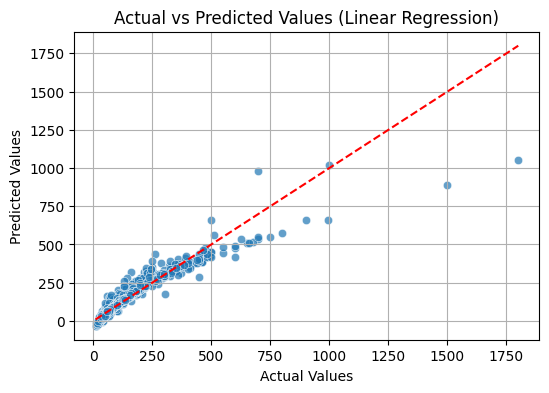

In [34]:

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=lr_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


In [35]:
# random forest
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
rf_best_model = grid_search.best_estimator_

rf_pred = rf_best_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)


print("Random Forest Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {rf_mse}")
print(f"Mean Absolute Error: {rf_mae}")
print(f"R-squared: {rf_r2}")



rf_cv_scores = cross_val_score(rf_best_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Average R² from Cross-Validation: {rf_cv_scores.mean()}")


Random Forest Results:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 101.19942033138011
Mean Absolute Error: 1.2509125652843134
R-squared: 0.9907455800720686
Average R² from Cross-Validation: 0.9859965524714754


In [36]:
total_sqft = float(input("Enter the total square feet: "))
bhk = int(input("Enter the number of bedrooms (BHK): "))
bath = int(input("Enter the number of bathrooms: "))


sqft_per_bhk = total_sqft / bhk
bath_per_bhk = bath / bhk
price_per_sqft = total_sqft * 0.01 


new_data = pd.DataFrame({
    'total_sqft': [total_sqft],
    'bath': [bath],
    'bhk': [bhk],
    'price_per_sqft': [price_per_sqft],
    'sqft_per_bhk': [sqft_per_bhk],
    'bath_per_bhk': [bath_per_bhk],
})


new_data_scaled = scaler.transform(new_data)
predicted_price = rf_best_model.predict(new_data_scaled)
print(f"Predicted Price for new data in lakhs : {predicted_price[0]}")

Enter the total square feet:  3000
Enter the number of bedrooms (BHK):  3
Enter the number of bathrooms:  2


Predicted Price for new data in lakhs : 84.105


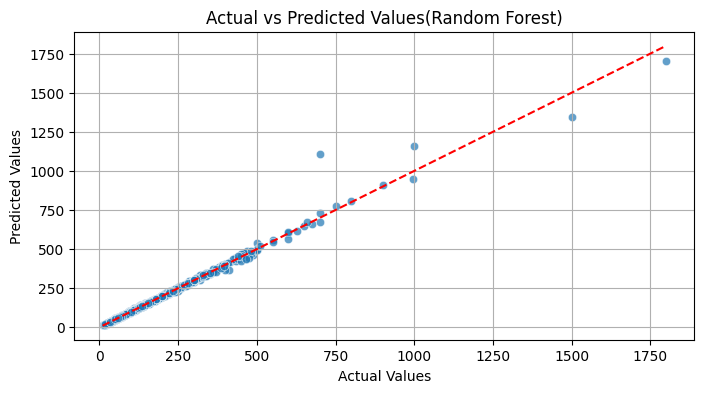

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - rf_pred

# Plot Actual vs. Predicted

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values(Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()


In [38]:
mape = np.mean(np.abs((y_test -rf_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"Mean Absolute Percentage Error of random forest is : {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")

Mean Absolute Percentage Error of random forest is : 0.66%
Accuracy: 99.34%


In [39]:
 # it is giving high accuracy so  for the overfitting
rf_train_r2 = rf_best_model.score(X_train_scaled, y_train)
rf_test_r2  =  rf_best_model.score(X_test_scaled, y_test)
print(f"Training R²: {rf_train_r2}")
print(f"Testing R²: {rf_test_r2}")


Training R²: 0.997969691928001
Testing R²: 0.9907455800720686


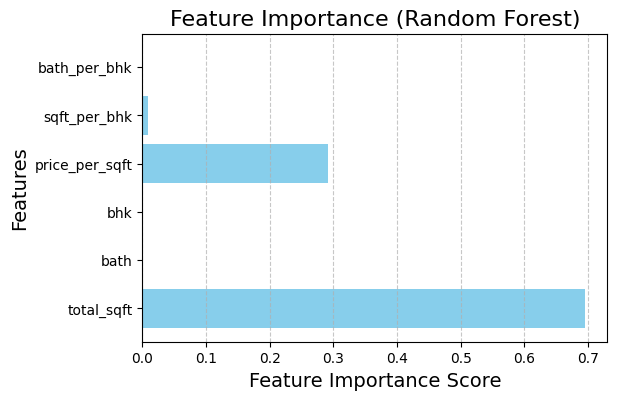

In [40]:
# Get feature importances
feature_importances =rf_best_model.feature_importances_
features = X.columns

plt.figure(figsize=(6, 4))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance (Random Forest)', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()